# Decision Tree

## Classification

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

In [3]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### Visualizing train Decision Tree using ```export_graphviz()``` and display it using ```Source.from_file```

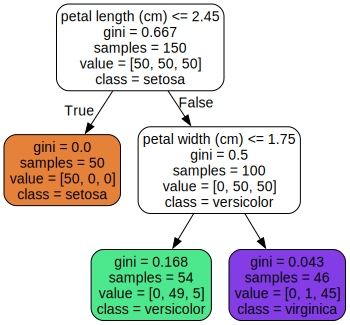

In [4]:
from sklearn.tree import export_graphviz
from graphviz import Source

export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=["petal length (cm)", "petal width (cm)"],
    class_names=iris.target_names,
    rounded=True,
    filled=True,
)

Source.from_file("iris_tree.dot")

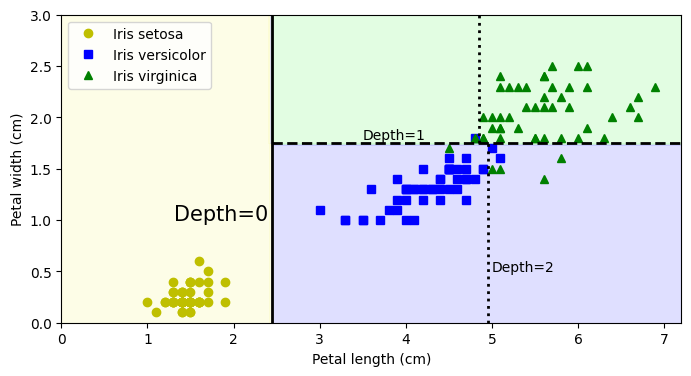

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])
plt.figure(figsize=(8, 4))

lengths, widths = np.meshgrid(np.linspace(0, 7.2, 100), np.linspace(0, 3, 100))
X_iris_all = np.c_[lengths.ravel(), widths.ravel()]
y_pred = tree_clf.predict(X_iris_all).reshape(lengths.shape)
plt.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)

for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X[:, 0][y == idx], X[:, 1][y == idx], style, label=f"Iris {name}")

tree_clf_deeper = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf_deeper.fit(X, y)
th0, th1, th2a, th2b = tree_clf_deeper.tree_.threshold[[0, 2, 3, 6]]
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.plot([th0, th0], [0, 3], "k-", linewidth=2)
plt.plot([th0, 7.2], [th1, th1], "k--", linewidth=2)
plt.plot([th2a, th2a], [0, th1], "k:", linewidth=2)
plt.plot([th2b, th2b], [th1, 3], "k:", linewidth=2)
plt.text(th0 - 0.05, 1.0, "Depth=0", horizontalalignment="right", fontsize=15)
plt.text(3.5, th1 + 0.01, "Depth=1", verticalalignment="bottom")
plt.text(th2a + 0.05, 0.5, "Depth=2")
plt.legend()

plt.show()

In [6]:
tree_clf.tree_

In [7]:
import sklearn

help(sklearn.tree._tree.Tree)

Help on class Tree in module sklearn.tree._tree:

class Tree(builtins.object)
 |  Array-based representation of a binary decision tree.
 |  
 |  The binary tree is represented as a number of parallel arrays. The i-th
 |  element of each array holds information about the node `i`. Node 0 is the
 |  tree's root. You can find a detailed description of all arrays in
 |  `_tree.pxd`. NOTE: Some of the arrays only apply to either leaves or split
 |  nodes, resp. In this case the values of nodes of the other type are
 |  arbitrary!
 |  
 |  Attributes
 |  ----------
 |  node_count : intp_t
 |      The number of nodes (internal nodes + leaves) in the tree.
 |  
 |  capacity : intp_t
 |      The current capacity (i.e., size) of the arrays, which is at least as
 |      great as `node_count`.
 |  
 |  max_depth : intp_t
 |      The depth of the tree, i.e. the maximum depth of its leaves.
 |  
 |  children_left : array of intp_t, shape [node_count]
 |      children_left[i] holds the node id of the

In [8]:
tree_clf.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [9]:
tree_clf.predict([[5, 1.5]])

array([1])

In [10]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


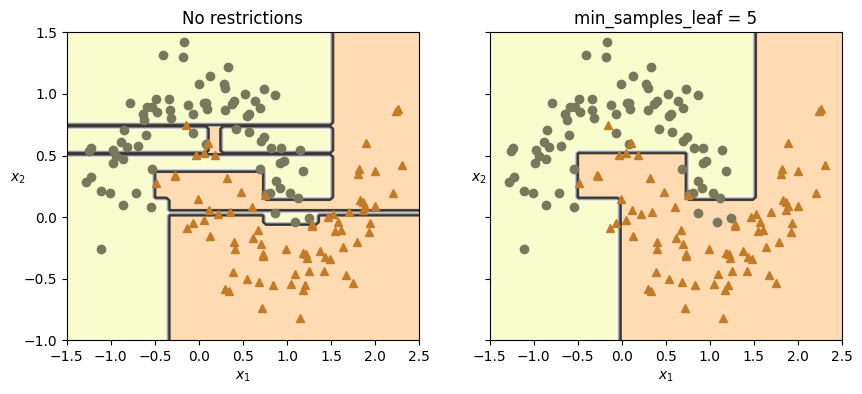

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(clf, X, y, axes, cmap):
    x1, x2 = np.meshgrid(
        np.linspace(axes[0], axes[1], 100), np.linspace(axes[2], axes[3], 100)
    )
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    # Use a valid matplotlib colormap for the background
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=cmap)
    plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8)

    colors = {"Wistia": ["#78785c", "#c47b27"], "Pastel1": ["red", "blue"]}
    markers = ("o", "^")
    for idx in (0, 1):
        plt.plot(
            X[:, 0][y == idx],
            X[:, 1][y == idx],
            color=colors[cmap][idx],
            marker=markers[idx],
            linestyle="none",
        )
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)


fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plot_decision_boundary(
    tree_clf1, X_moons, y_moons, axes=[-1.5, 2.5, -1, 1.5], cmap="Wistia"
)
plt.title("No restrictions")

plt.sca(axes[1])
plot_decision_boundary(
    tree_clf2, X_moons, y_moons, axes=[-1.5, 2.5, -1, 1.5], cmap="Wistia"
)
plt.title(f"min_samples_leaf = {tree_clf2.min_samples_leaf}")

plt.show()

In [12]:
tree_clf.score(X,y)

0.96

In [13]:
tree_clf1.score(X_moons, y_moons)

1.0

In [14]:
tree_clf2.score(X_moons, y_moons)

0.9466666666666667

In [15]:
X_moons_test, y_moons_test = make_moons(
    n_samples=1000, noise=0.2, random_state=42
)

tree_clf1.score(X_moons_test, y_moons_test)

0.901

In [16]:
tree_clf2.score(X_moons_test, y_moons_test)

0.918

## Regression

In [17]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X_reg = np.random.rand(200, 1) - 0.5
y_reg = X_reg**2 + 0.025 * np.random.randn(200, 1)

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_reg, y_reg)

,criterion,'squared_error'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


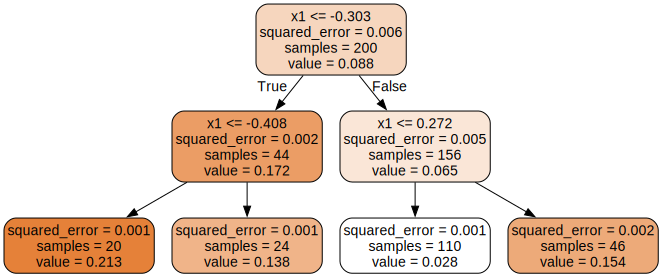

In [18]:
export_graphviz(
    tree_reg,
    out_file="regression_tree.dot",
    feature_names=["x1"],
    rounded=True,
    filled=True,
)

Source.from_file("regression_tree.dot")

In [19]:
tree_reg2 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg2.fit(X_reg, y_reg)

,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


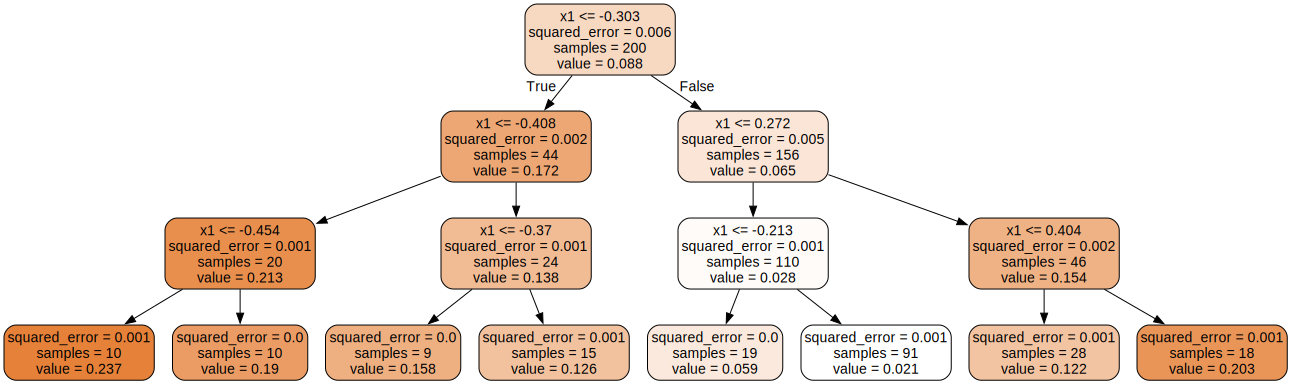

In [20]:
export_graphviz(
    tree_reg2,
    out_file='regression_tree2.dot',
    feature_names=['x1'],
    rounded=True,
    filled=True,
)

Source.from_file('regression_tree2.dot')

In [21]:
tree_reg.tree_.threshold

array([-0.30265072, -0.40830374, -2.        , -2.        ,  0.27175756,
       -2.        , -2.        ])

In [22]:
tree_reg2.tree_.threshold

array([-0.30265072, -0.40830374, -0.45416115, -2.        , -2.        ,
       -0.37022041, -2.        , -2.        ,  0.27175756, -0.21270403,
       -2.        , -2.        ,  0.40399227, -2.        , -2.        ])

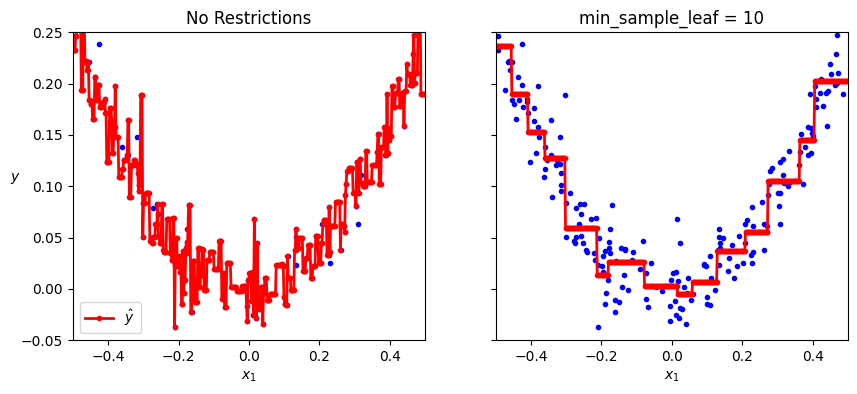

In [25]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg1.fit(X_reg, y_reg)

tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg2.fit(X_reg, y_reg)

x1 = np.linspace(-0.5, 0.5, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X_reg, y_reg, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([-0.5, 0.5, -0.05, 0.25])
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.title("No Restrictions")
plt.legend()

plt.sca(axes[1])
plt.plot(X_reg, y_reg, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.xlabel("$x_1$")
plt.axis([-0.5, 0.5, -0.05, 0.25])
plt.title(f"min_sample_leaf = {tree_reg2.min_samples_leaf}")

plt.show()

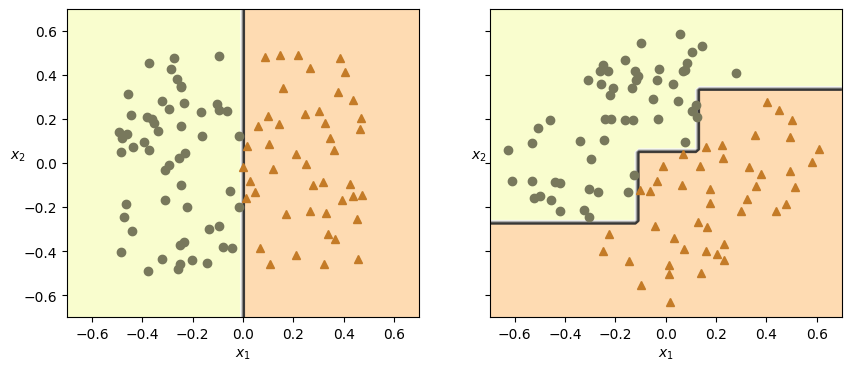

In [26]:
np.random.seed(6)
X_square = np.random.rand(100, 2) - 0.5
y_square = (X_square[:, 0] > 0).astype(np.int64)

angle = np.pi / 4
rotation_matrix = np.array(
    [
        [np.cos(angle), -np.sin(angle)],
        [np.sin(angle), np.cos(angle)],
    ]
)

X_rotated_square = X_square.dot(rotation_matrix)

tree_clf_square = DecisionTreeClassifier(random_state=42)
tree_clf_square.fit(X_square, y_square)

tree_clf_rotated_square = DecisionTreeClassifier(random_state=42)
tree_clf_rotated_square.fit(X_rotated_square, y_square)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plot_decision_boundary(
    tree_clf_square,
    X_square,
    y_square,
    axes=[-0.7, 0.7, -0.7, 0.7],
    cmap="Wistia",
)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.sca(axes[1])
plot_decision_boundary(
    tree_clf_rotated_square,
    X_rotated_square,
    y_square,
    axes=[-0.7, 0.7, -0.7, 0.7],
    cmap="Wistia",
)
# plt.ylabel("")

plt.show()


In [27]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pca_pipeline = make_pipeline(
    StandardScaler(),
    PCA(),
)
X_iris_pca = pca_pipeline.fit_transform(X)
tree_clf_pca = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_pca.fit(X_iris_pca, y)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


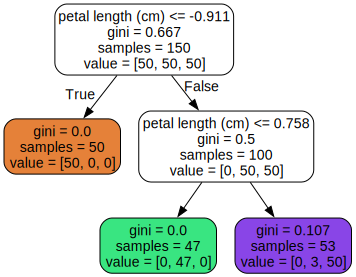

In [36]:
export_graphviz(
    tree_clf_pca,
    out_file='classification_pca.dot',
    feature_names=['petal length (cm)', 'petal width (cm)'],
    rounded=True,
    filled=True,
)

Source.from_file("classification_pca.dot")

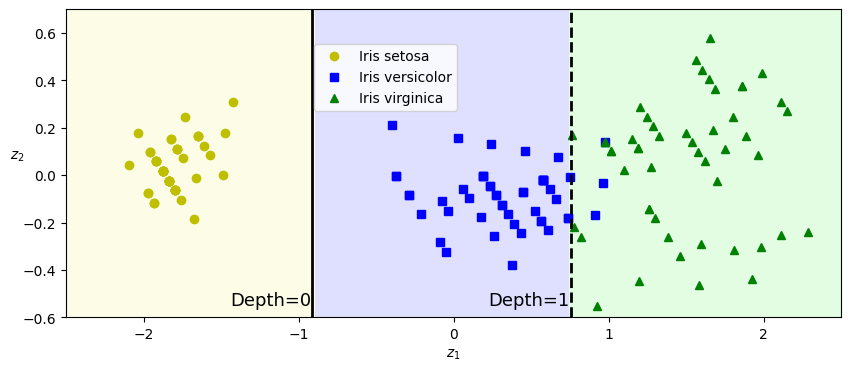

In [30]:
plt.figure(figsize=(10, 4))

axes = [-2.5, 2.5, -0.6, 0.7]

z0s, z1s = np.meshgrid(
    np.linspace(axes[0], axes[1], 100),
    np.linspace(axes[2], axes[3], 100),
)

X_iris_pca_all = np.c_[z0s.ravel(), z1s.ravel()]
y_pred = tree_clf_pca.predict(X_iris_pca_all).reshape(z0s.shape)

plt.contourf(z0s, z1s, y_pred, alpha=0.3, cmap=custom_cmap)
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(
        X_iris_pca[:, 0][y == idx],
        X_iris_pca[:, 1][y == idx],
        style,
        label=f"Iris {name}",
    )

plt.xlabel("$z_1$")
plt.ylabel("$z_2$", rotation=0)
th1, th2 = tree_clf_pca.tree_.threshold[[0, 2]]
plt.plot([th1, th1], axes[2:], "k-", linewidth=2)
plt.plot([th2, th2], axes[2:], "k--", linewidth=2)
plt.text(
    th1 - 0.01,
    axes[2] + 0.05,
    "Depth=0",
    horizontalalignment="right",
    fontsize=13,
)
plt.text(
    th2 - 0.01,
    axes[2] + 0.05,
    "Depth=1",
    horizontalalignment="right",
    fontsize=13,
)
plt.axis(axes)
plt.legend(loc=(0.32, 0.67))
plt.show()

In [31]:
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X, y)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,40
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


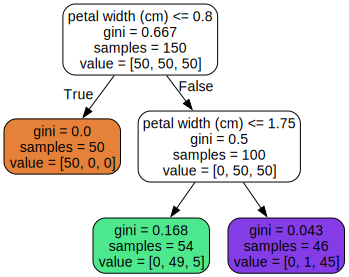

In [35]:
export_graphviz(
    tree_clf_tweaked,
    out_file='classification_tweaked.dot',
    feature_names=['petal length (cm)', 'petal width (cm)'],
    rounded=True,
    filled=True,
)

Source.from_file('classification_tweaked.dot')

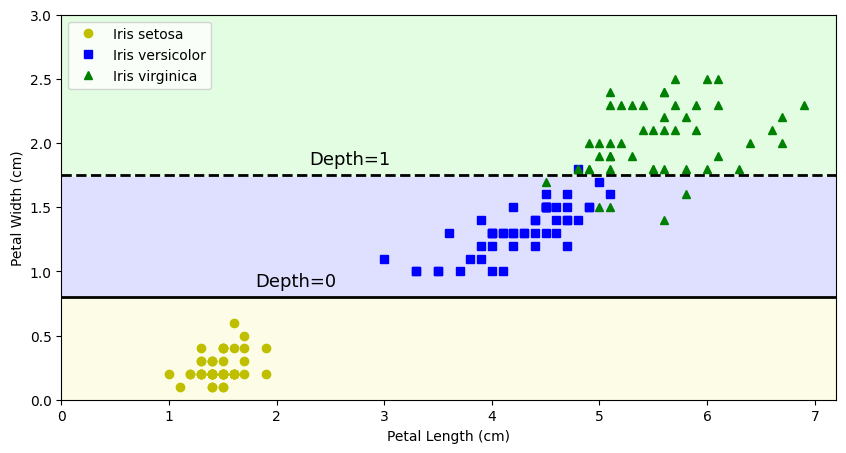

In [33]:
plt.figure(figsize=(10, 5))

y_pred = tree_clf_tweaked.predict(X_iris_all).reshape(lengths.shape)
plt.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)

for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X[:, 0][y == idx], X[:, 1][y == idx], style, label=f"Iris {name}")

th0, th1 = tree_clf_tweaked.tree_.threshold[[0, 2]]
plt.plot([0, 7.2], [th0, th0], "k-", linewidth=2)
plt.plot([0, 7.2], [th1, th1], "k--", linewidth=2)
plt.text(
    1.8,
    th0 + 0.05,
    "Depth=0",
    verticalalignment="bottom",
    fontsize=13,
)

plt.text(
    2.3,
    th1 + 0.05,
    "Depth=1",
    verticalalignment="bottom",
    fontsize=13,
)

plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.axis([0,7.2, 0, 3])
plt.legend()

plt.show()